# Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os

# Import Data

In [2]:
# Folder path
path = r'C:\Users\davib\Documents\Instacart Basket Analysis'

In [3]:
# Import latest version of ords/prods/cust dataset
df_ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

# Explore Data

In [4]:
df_ords_prods_cust.shape

(32404859, 30)

In [5]:
crosstab = pd.crosstab(df_ords_prods_cust['days_since_prior_order'], df_ords_prods_cust['orders_#'], dropna = False)

In [6]:
crosstab.to_clipboard()

# 2) Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [7]:
# Drop first and last name as they are PII data
df_ords_prods_cust.drop('First Name', inplace=True, axis=1)
df_ords_prods_cust.drop('Surnam', inplace=True, axis=1)

In [12]:
for col in df_ords_prods_cust.columns: 
    print(col)

order_id
user_id
eval_set
orders_#
order_dow
order_hour_of_day
days_since_prior_order
product_id
add_to_cart_order
reordered
product_name
aisle_id
department_id
prices
_merge
max_order
loyalty_flag
average_price
spending_flag
median_prior_orders
order_frequency_flag
gender
state
age
date_joined
number_dependants
family_status
income


In [13]:
# Check output 
df_ords_prods_cust[['max_order', 'loyalty_flag', 'spending_flag', 'order_frequency_flag']].head(500)

,max_order,loyalty_flag,spending_flag,order_frequency_flag
0,10,New customer,Low spender,Non-frequent customer
1,10,New customer,Low spender,Non-frequent customer
2,10,New customer,Low spender,Non-frequent customer
3,10,New customer,Low spender,Non-frequent customer
4,10,New customer,Low spender,Non-frequent customer
...,...,...,...,...
495,33,Regular customer,Low spender,Frequent customer
496,33,Regular customer,Low spender,Frequent customer
497,33,Regular customer,Low spender,Frequent customer
498,33,Regular customer,Low spender,Frequent customer


# 3) The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
a) Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).

In [18]:
# Execute for-loop specifying REGIONS
result = []

for value in df_ords_prods_cust['state']:
  if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    result.append('Northeast')
  elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Missouri' or value == 'Minnesota' or value == 'Iowa':
    result.append('Midwest')
  elif value == 'Idaho' or value == 'Montana' or value == 'Wyoming' or value == 'Nevada' or value == 'Utah' or value == 'Colorado' or value == 'Arizona' or value == 'New Mexico' or value == 'Alaska' or value == 'Washington' or value == 'Oregon' or value == 'California' or value == 'Hawaii':
    result.append('West')  
  else:
    result.append('South')

In [21]:
# Print result
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [19]:
# Create new column for Regions
df_ords_prods_cust['Region'] = result

In [20]:
# Check output
df_ords_prods_cust[['state','Region']].head(500)

,state,Region
0,Alabama,South
1,Alabama,South
2,Alabama,South
3,Alabama,South
4,Alabama,South
...,...,...
495,Montana,West
496,Montana,West
497,Montana,West
498,Montana,West


# 3b) Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [22]:
# Create crosstab to compare spending habits
crosstab1 = pd.crosstab(df_ords_prods_cust['spending_flag'], df_ords_prods_cust['Region'], dropna = False)

In [23]:
# Check output
crosstab1

Region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,29444,18662,40890,31347
Low spender,7567881,5704074,10750995,8261566


There is no significant difference in spending habits between different US regions.

# 4) The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [25]:
# Derive columns with loc()
df_ords_prods_cust.loc[df_ords_prods_cust['orders_#'] >= 5, 'activity flag'] = 'High activity'
df_ords_prods_cust.loc[df_ords_prods_cust['orders_#'] < 5, 'activity flag'] = 'Low activity'

In [26]:
# Check output
df_ords_prods_cust[['orders_#','user_id','activity flag']].head(60)

,orders_#,user_id,activity flag
0,1,1,Low activity
1,2,1,Low activity
2,3,1,Low activity
3,4,1,Low activity
4,5,1,High activity
5,6,1,High activity
6,7,1,High activity
7,8,1,High activity
8,9,1,High activity
9,10,1,High activity


In [27]:
# Remove customers with low activity
df_ords_prods_cust.drop(df_ords_prods_cust.index[df_ords_prods_cust['activity flag'] == 'Low activity'], inplace = True)

In [28]:
# Check output
df_ords_prods_cust.head(60)

,order_id,user_id,eval_set,orders_#,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,gender,state,age,date_joined,number_dependants,family_status,income,Region,activity flag
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
5,3367565,1,prior,6,2,7,19.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
6,550135,1,prior,7,1,9,20.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
7,3108588,1,prior,8,1,14,14.0,196,2,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
8,2295261,1,prior,9,1,16,0.0,196,4,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
9,2550362,1,prior,10,4,8,30.0,196,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
15,431534,1,prior,5,4,15,28.0,12427,2,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
16,3367565,1,prior,6,2,7,19.0,12427,2,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
17,550135,1,prior,7,1,9,20.0,12427,3,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity
18,3108588,1,prior,8,1,14,14.0,12427,1,1,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity


# 5) The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [29]:
# Derive columns with loc()
df_ords_prods_cust.loc[(df_ords_prods_cust['age'] > 40) & (df_ords_prods_cust['family_status'] != 'married') & (df_ords_prods_cust['number_dependants'] == 0), 'Customer Profile'] = 'Old single adult'
df_ords_prods_cust.loc[(df_ords_prods_cust['age'] <= 40) & (df_ords_prods_cust['family_status'] != 'married') & (df_ords_prods_cust['number_dependants'] == 0), 'Customer Profile'] = 'Young single adult'
df_ords_prods_cust.loc[(df_ords_prods_cust['age'] <= 40) & (df_ords_prods_cust['family_status'] != 'married') & (df_ords_prods_cust['number_dependants'] >= 1), 'Customer Profile'] = 'Young single parent'
df_ords_prods_cust.loc[(df_ords_prods_cust['age'] > 40) & (df_ords_prods_cust['family_status'] != 'married') & (df_ords_prods_cust['number_dependants'] >= 1), 'Customer Profile'] = 'Old single parent'
df_ords_prods_cust.loc[(df_ords_prods_cust['age'] <= 40) & (df_ords_prods_cust['family_status'] == 'married') & (df_ords_prods_cust['number_dependants'] >= 1), 'Customer Profile'] = 'Young married parent'
df_ords_prods_cust.loc[(df_ords_prods_cust['age'] > 40) & (df_ords_prods_cust['family_status'] == 'married') & (df_ords_prods_cust['number_dependants'] >= 1), 'Customer Profile'] = 'Old married parent'
df_ords_prods_cust.loc[(df_ords_prods_cust['age'] <= 40) & (df_ords_prods_cust['family_status'] == 'married') & (df_ords_prods_cust['number_dependants'] == 0), 'Customer Profile'] = 'Young married adult'
df_ords_prods_cust.loc[(df_ords_prods_cust['age'] > 40) & (df_ords_prods_cust['family_status'] == 'married') & (df_ords_prods_cust['number_dependants'] == 0), 'Customer Profile'] = 'Old married adult'

In [30]:
# Check output
df_ords_prods_cust[['age','family_status','number_dependants','Customer Profile']].head(200)

,age,family_status,number_dependants,Customer Profile
4,31,married,3,Young married parent
5,31,married,3,Young married parent
6,31,married,3,Young married parent
7,31,married,3,Young married parent
8,31,married,3,Young married parent
...,...,...,...,...
324,62,married,1,Old married parent
325,62,married,1,Old married parent
326,62,married,1,Old married parent
327,62,married,1,Old married parent


# 6) Create an appropriate visualization to show the distribution of profiles.

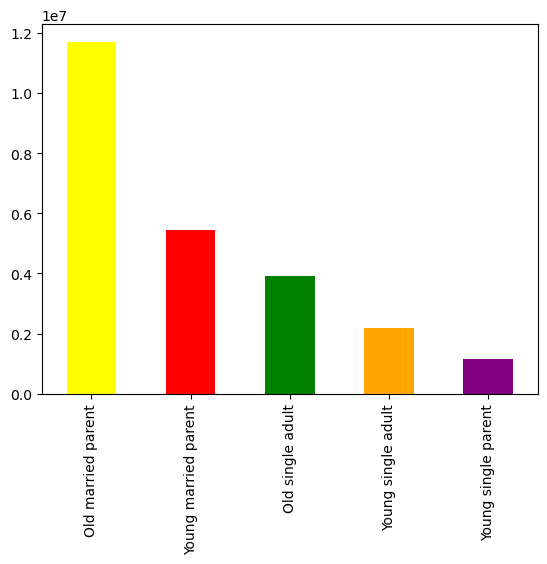

In [34]:
# Create barchart showing value count of each customer profile
bar_customer_profile = df_ords_prods_cust['Customer Profile'].value_counts().plot.bar(color =['yellow', 'red', 'green', 'orange', 'purple'])

In [36]:
# Export barchart
bar_customer_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_customer_profile.png'))

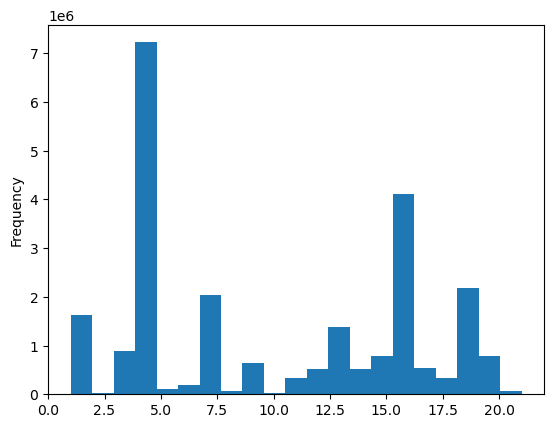

In [37]:
# Create histogram showing value count of each customer profile
hist_customer_profile = df_ords_prods_cust['department_id'].plot.hist(bins = 21)

In [38]:
# Export histogram
hist_customer_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_customer_profile.png'))

# 7) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [39]:
# Apply aggregate function to find max, mean, min of prices per customer profile
df_ords_prods_cust.groupby('Customer Profile').agg({'prices' : ['mean', 'min', 'max']})

prices           
                          mean  min   max
Customer Profile                         
Old married parent    7.791461  1.0  25.0
Old single adult      7.794853  1.0  25.0
Young married parent  7.783919  1.0  25.0
Young single adult    7.782060  1.0  25.0
Young single parent   7.799995  1.0  25.0

In [42]:
# Apply aggregate function to find max, mean, min of median days since prior order per customer profile
df_ords_prods_cust.groupby('Customer Profile').agg({'median_prior_orders' : ['mean', 'min', 'max']})

median_prior_orders           
                                    mean  min   max
Customer Profile                                   
Old married parent              8.973221  0.0  30.0
Old single adult                8.873899  0.0  30.0
Young married parent            8.947101  0.0  30.0
Young single adult              9.032295  0.0  30.0
Young single parent             8.874370  0.0  30.0

# 8) Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [43]:
df_ords_prods_cust.shape

(24414877, 31)

In [44]:
df_ords_prods_cust['spending_flag'].value_counts(dropna = False)

Low spender     24350343
High spender       64534
Name: spending_flag, dtype: int64

In [45]:
df_ords_prods_cust['order_frequency_flag'].value_counts(dropna = False)

Frequent customer        18136758
Regular customer          4814601
Non-frequent customer     1463518
Name: order_frequency_flag, dtype: int64

In [46]:
df_ords_prods_cust['activity flag'].value_counts(dropna = False)

High activity    24414877
Name: activity flag, dtype: int64

# Export 

In [49]:
# Export to pkl
df_ords_prods_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers.pkl'))